In [1]:
#needed Modules
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#import the csv
file_to_load = "allgames_stats.csv"

# Read Purchasing File and store into Pandas data frame
allgame_stat = pd.read_csv(file_to_load)
allgame_stat.head()

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [3]:
allgame_stat=allgame_stat.fillna(0)

In [4]:
allgame_stat.PTS.unique()

array([ 0.,  1.,  5., 10.,  2.,  6.,  4., 16.,  3., 11., 12.,  8., 21.,
        9., 17.,  7., 19., 13., 18., 20., 15., 24., 23., 25., 14., 27.,
       30., 33., 26., 22., 32., 29., 38., 28., 31., 40., 37., 43., 36.,
       51., 35., 45., 34., 47., 44., 39., 56., 41., 46., 42., 52., 55.,
       48., 62., 50., 81., 53., 58., 65., 60., 61., 49., 57.])

In [5]:
allgame_stat[("PTS")] = allgame_stat[("PTS")].astype(int)

# allgame_stat = allgame_stat.astype({'PTS': 'int32'})

In [6]:
# allgame_stat.dtypes

In [7]:
allgame_stat_filtered = allgame_stat.loc[:,[
            "Date",
            "Result",
            "Player",
            "PTS",
            "RSorPO",]]
# allgame_stat_filtered

In [8]:
#create dataframes based on player
kobe_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Kobe Bryant")]
lebron_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Lebron James")]
jordan_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Michael Jordan")]

#regular season stats
kobe_rs = kobe_total[(kobe_total['RSorPO']=="Regular Season")]
lebron_rs = lebron_total[(lebron_total['RSorPO']=="Regular Season")]
jordan_rs = jordan_total[(jordan_total['RSorPO']=="Regular Season")]

#playoff stats
kobe_po = kobe_total[(kobe_total['RSorPO']=="Playoffs")]
lebron_po = lebron_total[(lebron_total['RSorPO']=="Playoffs")]
jordan_po = jordan_total[(jordan_total['RSorPO']=="Playoffs")]

In [9]:
#Filters by player and part of season as shown above. Will consolidate after framework is complete. 


#Jordan
# jordan_total = allgame_stat_filtered[(allgame_stat_filtered['Player']=="Michael Jordan")]
jordan_rs_pts = jordan_rs
jordan_po_pts = jordan_po

# Lebron
lebron_rs_pts = lebron_rs
lebron_po_pts = lebron_po

# Kobe
kobe_rs_pts = kobe_rs
kobe_po_pts = kobe_po

In [10]:
#add in new index to allow for graphing. Old index will cause shift in graph placement based on win

# jordan_rs_pts['Game']=np.arange(jordan_rs_pts.shape[0])

# jordan_rs_pts

In [11]:
#Filter graph based on win (W)

#Jordan 
jordan_rs_pts_w = jordan_rs_pts[(jordan_rs_pts['Result']=="W")]
jordan_rs_pts_l = jordan_rs_pts[(jordan_rs_pts['Result']=="L")]
jordan_po_pts_w = jordan_po_pts[(jordan_po_pts['Result']=="W")]
jordan_po_pts_l = jordan_po_pts[(jordan_po_pts['Result']=="L")]


# Lebron 
lebron_rs_pts_w = lebron_rs_pts[(lebron_rs_pts['Result']=="W")]
lebron_rs_pts_l = lebron_rs_pts[(lebron_rs_pts['Result']=="L")]
lebron_po_pts_w = lebron_po_pts[(lebron_po_pts['Result']=="W")]
lebron_po_pts_l = lebron_po_pts[(lebron_po_pts['Result']=="L")]


# Kobe 
kobe_rs_pts_w = kobe_rs_pts[(kobe_rs_pts['Result']=="W")]
kobe_rs_pts_l = kobe_rs_pts[(kobe_rs_pts['Result']=="L")]
kobe_po_pts_w = kobe_po_pts[(kobe_po_pts['Result']=="W")]
kobe_po_pts_l = kobe_po_pts[(kobe_po_pts['Result']=="L")]

In [12]:
#search for Unique values
# jordan_rs_pts_w.PTS.unique()


In [13]:
# jordan_rs_pts_w.PTS.unique()

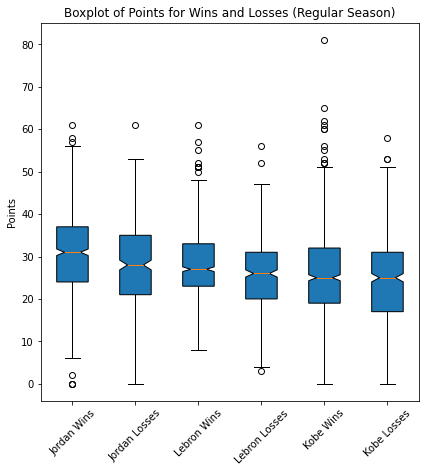

In [14]:
#Regular Season
jordan_rs_pts_w = jordan_rs_pts_w.loc[:,'PTS']
jordan_rs_pts_l = jordan_rs_pts_l.loc[:,'PTS']

lebron_rs_pts_w = lebron_rs_pts_w.loc[:,'PTS']
lebron_rs_pts_l = lebron_rs_pts_l.loc[:,'PTS']

kobe_rs_pts_w = kobe_rs_pts_w.loc[:,'PTS']
kobe_rs_pts_l = kobe_rs_pts_l.loc[:,'PTS']


data = [jordan_rs_pts_w, jordan_rs_pts_l,lebron_rs_pts_w ,lebron_rs_pts_l,kobe_rs_pts_w,kobe_rs_pts_l]

fig=plt.figure(figsize=(7,7))
ax=fig.add_axes([0.15,0.15,0.75,0.75])
ax.set_title('Boxplot of Points for Wins and Losses (Regular Season)')
# ax.set_xlabel('Win/Loss per player')
ax.set_ylabel('Points')

bp = ax.boxplot(data,
               notch=True,
                vert=True,
                patch_artist=True,
               )


plt.xticks([1, 2,3,4,5,6], ['Jordan Wins', 'Jordan Losses','Lebron Wins', 'Lebron Losses','Kobe Wins', 'Kobe Losses'],rotation=45)
plt.savefig('Points_RS.png')

plt.show()

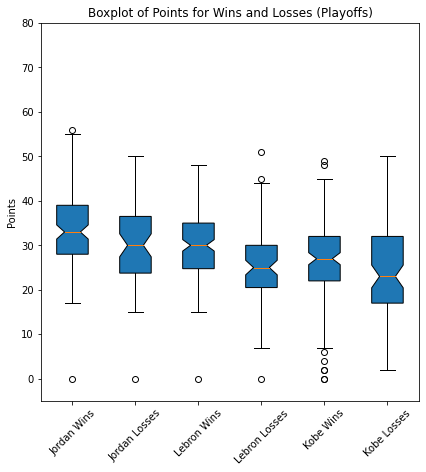

In [15]:
#Playoff Boxplot

jordan_po_pts_w = jordan_po_pts_w.loc[:,'PTS']
jordan_po_pts_l = jordan_po_pts_l.loc[:,'PTS']

lebron_po_pts_w = lebron_po_pts_w.loc[:,'PTS']
lebron_po_pts_l = lebron_po_pts_l.loc[:,'PTS']

kobe_po_pts_w = kobe_po_pts_w.loc[:,'PTS']
kobe_po_pts_l = kobe_po_pts_l.loc[:,'PTS']


data = [jordan_po_pts_w, jordan_po_pts_l,lebron_po_pts_w ,lebron_po_pts_l,kobe_po_pts_w,kobe_po_pts_l]

fig=plt.figure(figsize=(7,7))
ax=fig.add_axes([0.15,0.15,0.75,0.75])
ax.set_title('Boxplot of Points for Wins and Losses (Playoffs)')
# ax.set_xlabel('Win/Loss per player')
ax.set_ylabel('Points')

bp = ax.boxplot(data,
               notch=True,
                vert=True,
                patch_artist=True,
               )


plt.xticks([1, 2,3,4,5,6], ['Jordan Wins', 'Jordan Losses','Lebron Wins', 'Lebron Losses','Kobe Wins', 'Kobe Losses'],rotation=45)
plt.ylim(-5,80)
plt.savefig('Points_PO.png')

plt.show()



In [28]:
allgame_stat


,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,0,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,0,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2,1.9,Kobe Bryant,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,17,1998-06-05,CHI,@,UTA,W,1,40:00,14.0,33.0,...,5,3,1.0,1.0,0,2,37,24.8,Michael Jordan,Playoffs
4250,18,1998-06-07,CHI,0,UTA,W,1,32:00,7.0,14.0,...,3,2,1.0,1.0,2,1,24,18.6,Michael Jordan,Playoffs
4251,19,1998-06-10,CHI,0,UTA,W,1,43:00,12.0,27.0,...,8,2,2.0,0.0,3,1,34,21.5,Michael Jordan,Playoffs
4252,20,1998-06-12,CHI,0,UTA,L,1,45:00,9.0,26.0,...,4,4,3.0,0.0,4,4,28,14.8,Michael Jordan,Playoffs


In [21]:
allgame_stat_data = allgame_stat[(allgame_stat['PTS']==0) & (allgame_stat['MP']==0)]                
allgame_stat_data

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO


In [31]:
for x in allgame_stat_data:
    if allgame_stat['PTS']==0 and allgame_stat['MP']==0:
                    print("Delete lines for game # " allgame_stat['G'])
    elif:
            print("There are no rows to eliminate")

SyntaxError: invalid syntax (<ipython-input-31-50be17170d02>, line 3)